In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv("https://stooq.com/q/d/l/?s=cdr&d1=20190101&d2=20220201&i=d")
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,2019-01-02,140.66,146.36,137.46,146.07,203661
1,2019-01-03,145.88,145.88,142.20,143.17,231128
2,2019-01-04,143.17,145.88,143.17,145.78,169481
3,2019-01-07,147.04,149.55,146.56,148.69,194329
4,2019-01-08,149.45,151.58,147.04,148.59,287699


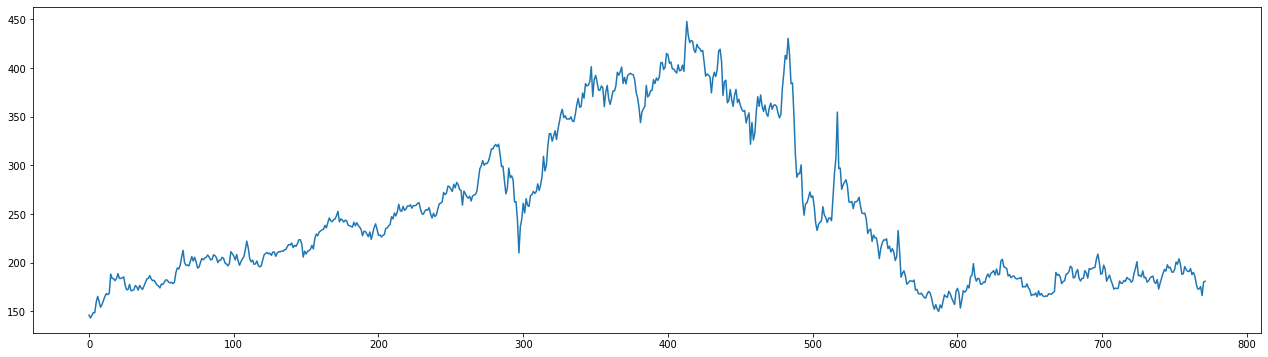

In [3]:
stock_data.Close.plot(figsize=(22,6))

In [4]:
close_data = stock_data[["Close"]].values
print(close_data[:5])

[[146.07]
 [143.17]
 [145.78]
 [148.69]
 [148.59]]


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaler = scaler.fit(close_data)

X = data_scaler.transform(close_data)
print(X[:5])

[[0.00951662]
 [0.        ]
 [0.00856496]
 [0.0181144 ]
 [0.01778624]]


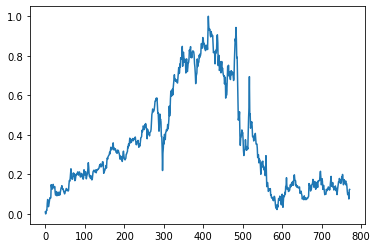

In [6]:
plt.plot(X)

In [7]:
time_step = 10 # liczba próbek historycznych względem próbki N
number_of_rows = len(X)

X_samples = []
y_samples = []
for i in range(time_step, number_of_rows):
  x_sample = X[i-time_step:i]
  y_sample = X[i]

  X_samples.append(x_sample)
  y_samples.append(y_sample)


In [8]:
X_data = np.array(X_samples)
print(X_data.shape)

y_data = np.array(y_samples)
print(y_data.shape)

(762, 10, 1)
(762, 1)


In [9]:
qnty = int(len(X_data)*0.15)
print(qnty)

X_train = X_data[:-qnty]
X_test = X_data[-qnty:]

y_train = y_data[:-qnty]
y_test = y_data[-qnty:]

114


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.random import set_seed

In [11]:
set_seed(42)

model = Sequential()

model.add( LSTM(10, activation="relu", input_shape=(time_step,1), return_sequences=True) )

model.add( LSTM(5, activation="relu", input_shape=(time_step,1), return_sequences=True) )

model.add( LSTM(5, activation="relu", return_sequences=False) )

model.add( Dense(1))

In [12]:
model.compile(optimizer="adam", loss="mae")

In [13]:
result = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
21/21 [==============================] - 10s 27ms/step - loss: 0.3862
Epoch 2/150
21/21 [==============================] - 1s 31ms/step - loss: 0.3634
Epoch 3/150
21/21 [==============================] - 1s 26ms/step - loss: 0.3410
Epoch 4/150
21/21 [==============================] - 1s 33ms/step - loss: 0.3142
Epoch 5/150
21/21 [==============================] - 1s 30ms/step - loss: 0.2700
Epoch 6/150
21/21 [==============================] - 1s 26ms/step - loss: 0.1487
Epoch 7/150
21/21 [==============================] - 1s 24ms/step - loss: 0.0870
Epoch 8/150
21/21 [==============================] - 1s 32ms/step - loss: 0.0751
Epoch 9/150
21/21 [==============================] - 1s 34ms/step - loss: 0.0745
Epoch 10/150
21/21 [==============================] - 1s 25ms/step - loss: 0.0691
Epoch 11/150
21/21 [==============================] - 1s 27ms/step - loss: 0.0645
Epoch 12/150
21/21 [==============================] - 0s 23ms/step - loss: 0.0605
Epoch 13/150
21/21 [====

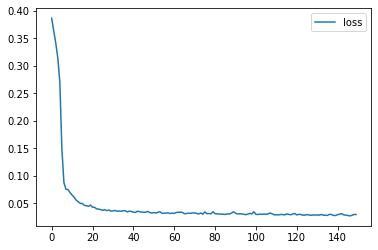

In [14]:
pd.DataFrame(result.history).plot()

In [15]:
last10d = data_scaler.transform( close_data[-time_step:] )
x =  last10d.reshape( (1,)+last10d.shape)
x.shape

(1, 10, 1)

In [16]:
data_scaler.inverse_transform( model.predict(x) )

array([[173.90826]], dtype=float32)

In [17]:
185 / 174 

1.0632183908045978